In [14]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [15]:
def generate(sample_size, mean, cov, diff, regression):
    num_classes = 2  # len(diff)
    samples_per_class = int(sample_size/2)

    X0 = np.random.multivariate_normal(mean, cov, samples_per_class)
    Y0 = np.zeros(samples_per_class)

    for ci, d in enumerate(diff):
        X1 = np.random.multivariate_normal(mean+d, cov, samples_per_class)
        Y1 = (ci+1)*np.ones(samples_per_class)

        X0 = np.concatenate((X0, X1))
        Y0 = np.concatenate((Y0, Y1))

    if regression == False:  # one-hot  0 into the vector "1 0
        class_ind = [Y == class_number for class_number in range(num_classes)]
        Y = np.asarray(np.hstack(class_ind), dtype=np.float32)
    X, Y = shuffle(X0, Y0)

    return X, Y

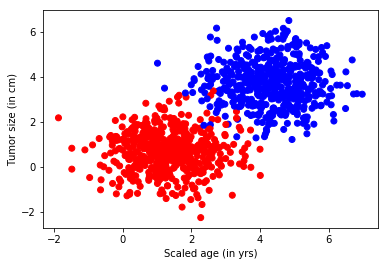

In [16]:
input_dim = 2
np.random.seed(10)
num_classes = 2
mean = np.random.randn(num_classes)
cov = np.eye(num_classes)
X, Y = generate(1000, mean, cov, [3.0], True)
colors = ['r' if l == 0 else 'b' for l in Y[:]]
plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.xlabel("Scaled age (in yrs)")
plt.ylabel("Tumor size (in cm)")
plt.show()
lab_dim = 1

In [17]:
# tf Graph Input
input_features = tf.placeholder(tf.float32, [None, input_dim])
input_lables = tf.placeholder(tf.float32, [None, lab_dim])
# Set model weights
W = tf.Variable(tf.random_normal([input_dim, lab_dim]), name="weight")
b = tf.Variable(tf.zeros([lab_dim]), name="bias")

output = tf.nn.sigmoid(tf.matmul(input_features, W) + b)
cross_entropy = -(input_lables * tf.log(output)
                  +(1 - input_lables) * tf.log(1 - output))
ser = tf.square(input_lables - output)
loss = tf.reduce_mean(cross_entropy)
err = tf.reduce_mean(ser)
optimizer = tf.train.AdamOptimizer(0.04)  # 尽量用这个--收敛快，会动态调节梯度
train = optimizer.minimize(loss)  # let the optimizer train

maxEpochs = 50
minibatchSize = 25

Epoch: 0001 cost= 0.459296882 err= 0.4095724055171013
Epoch: 0002 cost= 0.313649327 err= 0.23774684578180313
Epoch: 0003 cost= 0.210313067 err= 0.14164720095694064
Epoch: 0004 cost= 0.152792037 err= 0.08639662571251393
Epoch: 0005 cost= 0.121372931 err= 0.059849762730300425
Epoch: 0006 cost= 0.102370307 err= 0.04673106200993061
Epoch: 0007 cost= 0.089640096 err= 0.03944097544997931
Epoch: 0008 cost= 0.080438644 err= 0.034914057347923515
Epoch: 0009 cost= 0.073421299 err= 0.03185404010117054
Epoch: 0010 cost= 0.067858480 err= 0.029653274500742555
Epoch: 0011 cost= 0.063319094 err= 0.027996918032877148
Epoch: 0012 cost= 0.059530172 err= 0.02670715709682554
Epoch: 0013 cost= 0.056310024 err= 0.025676245163194836
Epoch: 0014 cost= 0.053532328 err= 0.024835000317543744
Epoch: 0015 cost= 0.051106639 err= 0.024136943691410125
Epoch: 0016 cost= 0.048965860 err= 0.02354962429497391
Epoch: 0017 cost= 0.047059659 err= 0.023049701454583557
Epoch: 0018 cost= 0.045349143 err= 0.022619918677955864
Ep

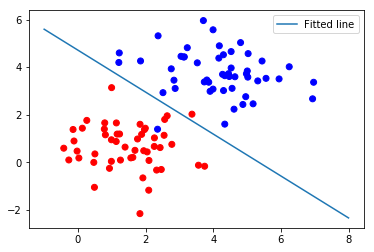

In [18]:
# 启动session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(maxEpochs):
        sumerr = 0
        for i in range(np.int32(len(Y)/minibatchSize)):
            x1 = X[i*minibatchSize:(i+1)*minibatchSize, :]
            y1 = np.reshape(Y[i*minibatchSize:(i+1)*minibatchSize], [-1, 1])
            tf.reshape(y1, [-1, 1])
            _, lossval, outputval, errval = sess.run([train, loss, output, err], feed_dict={
                                                     input_features: x1, input_lables: y1})
            sumerr = sumerr+errval

        print("Epoch:", '%04d' % (epoch+1), "cost=",
              "{:.9f}".format(lossval), "err=", sumerr/minibatchSize)

# 图形显示
    train_X, train_Y = generate(100, mean, cov, [3.0], True)
    colors = ['r' if l == 0 else 'b' for l in train_Y[:]]
    plt.scatter(train_X[:, 0], train_X[:, 1], c=colors)
    #plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y)
    # plt.colorbar()


#    x1w1+x2*w2+b=0
#    x2=-x1* w1/w2-b/w2
    x = np.linspace(-1, 8, 200)
    y = -x*(sess.run(W)[0]/sess.run(W)[1])-sess.run(b)/sess.run(W)[1]
    plt.plot(x, y, label='Fitted line')
    plt.legend()
    plt.show()

In [19]:
from matplotlib.colors import colorConverter, ListedColormap 
    
# 对于上面的fit可以这么扩展变成动态的
from sklearn.preprocessing import OneHotEncoder
def onehot(y,start,end):
    ohe = OneHotEncoder()
    a = np.linspace(start,end-1,end-start)
    b =np.reshape(a,[-1,1]).astype(np.int32)
    ohe.fit(b)
    c=ohe.transform(y).toarray()  
    return c     
#
    
def generate(sample_size, num_classes, diff,regression=False):
    np.random.seed(10)
    mean = np.random.randn(2)
    cov = np.eye(2)  
    
    #len(diff)
    samples_per_class = int(sample_size/num_classes)

    X0 = np.random.multivariate_normal(mean, cov, samples_per_class)
    Y0 = np.zeros(samples_per_class)
    
    for ci, d in enumerate(diff):
        X1 = np.random.multivariate_normal(mean+d, cov, samples_per_class)
        Y1 = (ci+1)*np.ones(samples_per_class)
    
        X0 = np.concatenate((X0,X1))
        Y0 = np.concatenate((Y0,Y1))
        #print(X0, Y0)
    
  
    if regression==False: #one-hot  0 into the vector "1 0
        Y0 = np.reshape(Y0,[-1,1])        
        #print(Y0.astype(np.int32))
        Y0 = onehot(Y0.astype(np.int32),0,num_classes)
        #print(Y0)
    X, Y = shuffle(X0, Y0)
    #print(X, Y)
    return X,Y    

/Users/she/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


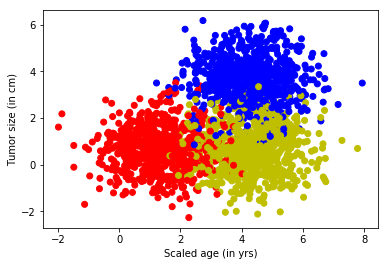

In [20]:
# Ensure we always get the same amount of randomness
np.random.seed(10)

input_dim = 2
num_classes =3 
X, Y = generate(2000,num_classes,  [[3.0],[3.0,0]],False)
aa = [np.argmax(l) for l in Y]
colors =['r' if l == 0 else 'b' if l==1 else 'y' for l in aa[:]]

plt.scatter(X[:,0], X[:,1], c=colors)
plt.xlabel("Scaled age (in yrs)")
plt.ylabel("Tumor size (in cm)")
plt.show()

In [21]:
lab_dim = num_classes
# tf Graph Input
input_features = tf.placeholder(tf.float32, [None, input_dim])
input_lables = tf.placeholder(tf.float32, [None, lab_dim])
# Set model weights
W = tf.Variable(tf.random_normal([input_dim, lab_dim]), name="weight")
b = tf.Variable(tf.zeros([lab_dim]), name="bias")
output = tf.matmul(input_features, W) + b

z = tf.nn.softmax(output)

a1 = tf.argmax(tf.nn.softmax(output), axis=1)  # 按行找出最大索引，生成数组
b1 = tf.argmax(input_lables, axis=1)
err = tf.count_nonzero(a1-b1)  # 两个数组相减，不为0的就是错误个数

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(
    labels=input_lables, logits=output)
loss = tf.reduce_mean(cross_entropy)  # 对交叉熵取均值很有必要


optimizer = tf.train.AdamOptimizer(0.04)  # 尽量用这个--收敛快，会动态调节梯度
train = optimizer.minimize(loss)  # let the optimizer train

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



Epoch: 0001 cost= 0.394722134 err= 0.7519999999999994
Epoch: 0002 cost= 0.334549755 err= 0.3472000000000002
Epoch: 0003 cost= 0.323749900 err= 0.33120000000000016
Epoch: 0004 cost= 0.325551718 err= 0.32640000000000013
Epoch: 0005 cost= 0.331348419 err= 0.3120000000000002
Epoch: 0006 cost= 0.338327646 err= 0.3056000000000002
Epoch: 0007 cost= 0.345429003 err= 0.3024000000000002
Epoch: 0008 cost= 0.352233380 err= 0.2976000000000002
Epoch: 0009 cost= 0.358583182 err= 0.2960000000000002
Epoch: 0010 cost= 0.364433438 err= 0.2912000000000002
Epoch: 0011 cost= 0.369789273 err= 0.29280000000000017
Epoch: 0012 cost= 0.374676585 err= 0.2864000000000002
Epoch: 0013 cost= 0.379129589 err= 0.2864000000000002
Epoch: 0014 cost= 0.383184195 err= 0.28480000000000016
Epoch: 0015 cost= 0.386875659 err= 0.28480000000000016
Epoch: 0016 cost= 0.390236735 err= 0.2832000000000002
Epoch: 0017 cost= 0.393298030 err= 0.2816000000000002
Epoch: 0018 cost= 0.396086931 err= 0.2800000000000002
Epoch: 0019 cost= 0.398

/Users/she/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


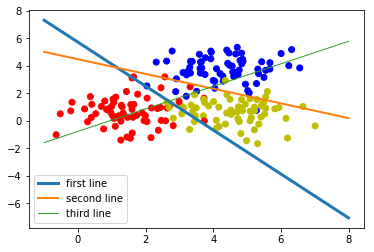

[[-2.0566251   0.94559455  1.0463932 ]
 [-1.2875776   1.7665117  -1.2785875 ]] [ 7.34091   -7.8879027 -1.0013189]


/Users/she/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


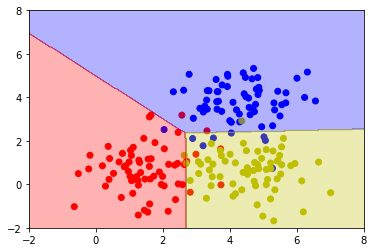

In [32]:
maxEpochs = 50
minibatchSize = 25

# 启动session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(maxEpochs):
        sumerr = 0
        for i in range(np.int32(len(Y)/minibatchSize)):
            x1 = X[i*minibatchSize:(i+1)*minibatchSize, :]
            y1 = Y[i*minibatchSize:(i+1)*minibatchSize, :]

            _, lossval, outputval, errval = sess.run([train, loss, output, err], feed_dict={
                                                     input_features: x1, input_lables: y1})
            sumerr = sumerr+(errval/minibatchSize)

        print("Epoch:", '%04d' % (epoch+1), "cost=",
              "{:.9f}".format(lossval), "err=", sumerr/minibatchSize)

    train_X, train_Y = generate(200, num_classes,  [[3.0], [3.0, 0]], False)
    aa = [np.argmax(l) for l in train_Y]
    colors = ['r' if l == 0 else 'b' if l == 1 else 'y' for l in aa[:]]
    plt.scatter(train_X[:, 0], train_X[:, 1], c=colors)

    x = np.linspace(-1, 8, 200)

    y = -x*(sess.run(W)[0][0]/sess.run(W)[1][0]) - \
        sess.run(b)[0]/sess.run(W)[1][0]
    plt.plot(x, y, label='first line', lw=3)

    y = -x*(sess.run(W)[0][1]/sess.run(W)[1][1]) - \
        sess.run(b)[1]/sess.run(W)[1][1]
    plt.plot(x, y, label='second line', lw=2)

    y = -x*(sess.run(W)[0][2]/sess.run(W)[1][2]) - \
        sess.run(b)[2]/sess.run(W)[1][2]
    plt.plot(x, y, label='third line', lw=1)

    plt.legend()
    plt.show()
    print(sess.run(W), sess.run(b))

    train_X, train_Y = generate(200, num_classes,  [[3.0], [3.0, 0]], False)
    aa = [np.argmax(l) for l in train_Y]
    colors = ['r' if l == 0 else 'b' if l == 1 else 'y' for l in aa[:]]
    plt.scatter(train_X[:, 0], train_X[:, 1], c=colors)

    nb_of_xs = 300
    xs1 = np.linspace(-2, 8, num=nb_of_xs)
    xs2 = np.linspace(-2, 8, num=nb_of_xs)
    xx, yy = np.meshgrid(xs1, xs2)  # create the grid
    # Initialize and fill the classification plane
    classification_plane = np.zeros((nb_of_xs, nb_of_xs))
    for i in range(nb_of_xs):
        for j in range(nb_of_xs):
            #classification_plane[i,j] = nn_predict(xx[i,j], yy[i,j])
            classification_plane[i, j] = sess.run(
                a1, feed_dict={input_features: [[xx[i, j], yy[i, j]]]})

    # Create a color map to show the classification colors of each grid point
    cmap = ListedColormap([
        colorConverter.to_rgba('r', alpha=0.30),
        colorConverter.to_rgba('b', alpha=0.30),
        colorConverter.to_rgba('y', alpha=0.30)])
    # Plot the classification plane with decision boundary and input samples
    plt.contourf(xx, yy, classification_plane, cmap=cmap)
    plt.show()

In [33]:
# 隐藏层解决非线性问题
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./MNIST_data/", one_hot=True)

# 参数设置
learning_rate = 0.001
training_epochs = 25
batch_size = 100
display_step = 1

# Network Parameters
n_hidden_1 = 256  # 1st layer number of features
n_hidden_2 = 256  # 2nd layer number of features
n_input = 784  # MNIST data 输入 (img shape: 28*28)
n_classes = 10  # MNIST 列别 (0-9 ，一共10类)

# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

# Create model


def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer


# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# 构建模型
pred = multilayer_perceptron(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# 初始化变量
init = tf.global_variables_initializer()


# 启动session
with tf.Session() as sess:
    sess.run(init)

    # 启动循环开始训练
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # 遍历全部数据集
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                          y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # 显示训练中的详细信息
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=",
                  "{:.9f}".format(avg_cost))
    print(" Finished!")

    # 测试 model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # 计算准确率
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval(
        {x: mnist.test.images, y: mnist.test.labels}))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Epoch: 0001 cost= 188.137107020
Epoch: 0002 cost= 44.669353844
Epoch: 0003 cost= 27.930944082
Epoch: 0004 cost= 19.552628649
Epoch: 0005 cost= 14.160683154
Epoch: 0006 cost= 10.727584778
Epoch: 0007 cost= 8.126443928
Epoch: 0008 cost= 6.299608756
Epoch: 0009 cost= 4.716384310
Epoch: 0010 cost

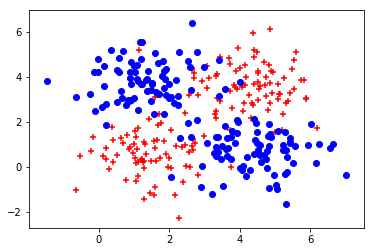

/Users/she/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1645: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Step: 0 Current loss: 0.37793082
Step: 1000 Current loss: 0.103821576
Step: 2000 Current loss: 0.08611782
Step: 3000 Current loss: 0.07551627
Step: 4000 Current loss: 0.069284864
Step: 5000 Current loss: 0.06586088
Step: 6000 Current loss: 0.06416744
Step: 7000 Current loss: 0.062962964
Step: 8000 Current loss: 0.06201011
Step: 9000 Current loss: 0.06111337
Step: 10000 Current loss: 0.060202908
Step: 11000 Current loss: 0.059117697
Step: 12000 Current loss: 0.057721663
Step: 13000 Current loss: 0.056091785
Step: 14000 Current loss: 0.054487377
Step: 15000 Current loss: 0.052980065
Step: 16000 Current loss: 0.05164187
Step: 17000 Current loss: 0.050516654
Step: 18000 Current loss: 0.049477346
Step: 19000 Current loss: 0.04854624


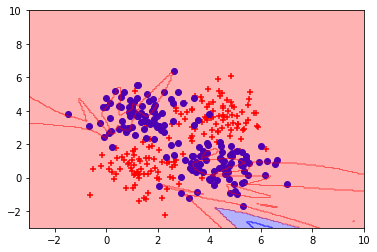

In [38]:
def onehot(y, start, end):
    ohe = OneHotEncoder()
    a = np.linspace(start, end-1, end-start)
    b = np.reshape(a, [-1, 1]).astype(np.int32)
    ohe.fit(b)
    c = ohe.transform(y).toarray()
    return c


def generate(sample_size, num_classes, diff, regression=False):
    np.random.seed(10)
    mean = np.random.randn(2)
    cov = np.eye(2)

    # len(diff)
    samples_per_class = int(sample_size/num_classes)

    X0 = np.random.multivariate_normal(mean, cov, samples_per_class)
    Y0 = np.zeros(samples_per_class)

    for ci, d in enumerate(diff):
        X1 = np.random.multivariate_normal(mean+d, cov, samples_per_class)
        Y1 = (ci+1)*np.ones(samples_per_class)

        X0 = np.concatenate((X0, X1))
        Y0 = np.concatenate((Y0, Y1))

    if regression == False:  # one-hot  0 into the vector "1 0
        Y0 = np.reshape(Y0, [-1, 1])
        # print(Y0.astype(np.int32))
        Y0 = onehot(Y0.astype(np.int32), 0, num_classes)
        # print(Y0)
    X, Y = shuffle(X0, Y0)
    #print(X, Y)
    return X, Y


# Ensure we always get the same amount of randomness
np.random.seed(10)

input_dim = 2
num_classes = 4
X, Y = generate(320, num_classes,  [[3.0, 0], [3.0, 3.0], [0, 3.0]], True)
Y = Y % 2
#colors = ['r' if l == 0.0 else 'b' for l in Y[:]]
#plt.scatter(X[:,0], X[:,1], c=colors)
xr = []
xb = []
for(l, k) in zip(Y[:], X[:]):
    if l == 0.0:
        xr.append([k[0], k[1]])
    else:
        xb.append([k[0], k[1]])
xr = np.array(xr)
xb = np.array(xb)
plt.scatter(xr[:, 0], xr[:, 1], c='r', marker='+')
plt.scatter(xb[:, 0], xb[:, 1], c='b', marker='o')

plt.show()
Y = np.reshape(Y, [-1, 1])

learning_rate = 1e-4
n_input = 2
n_label = 1
# n_hidden = 2#欠拟合
n_hidden = 200


x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_label])

weights = {
    'h1': tf.Variable(tf.truncated_normal([n_input, n_hidden], stddev=0.1)),
    'h2': tf.Variable(tf.random_normal([n_hidden, n_label], stddev=0.1))
}
biases = {
    'h1': tf.Variable(tf.zeros([n_hidden])),
    'h2': tf.Variable(tf.zeros([n_label]))
}


layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['h1']), biases['h1']))
#y_pred = tf.nn.tanh(tf.add(tf.matmul(layer_1, weights['h2']),biases['h2']))
# y_pred = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['h2']),biases['h2']))#局部最优解

#y_pred = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['h2']),biases['h2']))

# Leaky relus  40000次 ok
layer2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['h2'])
y_pred = tf.maximum(layer2, 0.01*layer2)


loss = tf.reduce_mean((y_pred-y)**2)
train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss)

# 加载
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

for i in range(20000):

    _, loss_val = sess.run([train_step, loss], feed_dict={x: X, y: Y})

    if i % 1000 == 0:
        print("Step:", i, "Current loss:", loss_val)

#colors = ['r' if l == 0.0 else 'b' for l in Y[:]]
#plt.scatter(X[:,0], X[:,1], c=colors)
xr = []
xb = []
for(l, k) in zip(Y[:], X[:]):
    if l == 0.0:
        xr.append([k[0], k[1]])
    else:
        xb.append([k[0], k[1]])
xr = np.array(xr)
xb = np.array(xb)
plt.scatter(xr[:, 0], xr[:, 1], c='r', marker='+')
plt.scatter(xb[:, 0], xb[:, 1], c='b', marker='o')


nb_of_xs = 200
xs1 = np.linspace(-3, 10, num=nb_of_xs)
xs2 = np.linspace(-3, 10, num=nb_of_xs)
xx, yy = np.meshgrid(xs1, xs2)  # create the grid
# Initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        #classification_plane[i,j] = nn_predict(xx[i,j], yy[i,j])
        classification_plane[i, j] = sess.run(
            y_pred, feed_dict={x: [[xx[i, j], yy[i, j]]]})
        classification_plane[i, j] = int(classification_plane[i, j])

# Create a color map to show the classification colors of each grid point
cmap = ListedColormap([
    colorConverter.to_rgba('r', alpha=0.30),
    colorConverter.to_rgba('b', alpha=0.30)])
# Plot the classification plane with decision boundary and input samples
plt.contourf(xx, yy, classification_plane, cmap=cmap)
plt.show()

loss:
 0.05968139


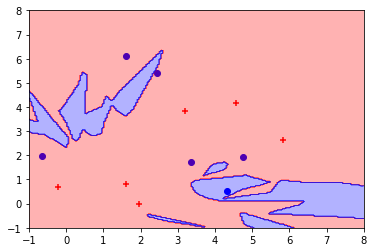

In [39]:
xTrain, yTrain = generate(
    12, num_classes,  [[3.0, 0], [3.0, 3.0], [0, 3.0]], True)
yTrain = yTrain % 2
#colors = ['r' if l == 0.0 else 'b' for l in yTrain[:]]
#plt.scatter(xTrain[:,0], xTrain[:,1], c=colors)

xr = []
xb = []
for(l, k) in zip(yTrain[:], xTrain[:]):
    if l == 0.0:
        xr.append([k[0], k[1]])
    else:
        xb.append([k[0], k[1]])
xr = np.array(xr)
xb = np.array(xb)
plt.scatter(xr[:, 0], xr[:, 1], c='r', marker='+')
plt.scatter(xb[:, 0], xb[:, 1], c='b', marker='o')


# plt.show()
yTrain = np.reshape(yTrain, [-1, 1])
print("loss:\n", sess.run(loss, feed_dict={x: xTrain, y: yTrain}))

nb_of_xs = 200
xs1 = np.linspace(-1, 8, num=nb_of_xs)
xs2 = np.linspace(-1, 8, num=nb_of_xs)
xx, yy = np.meshgrid(xs1, xs2)  # create the grid
# Initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        #classification_plane[i,j] = nn_predict(xx[i,j], yy[i,j])
        classification_plane[i, j] = sess.run(
            y_pred, feed_dict={x: [[xx[i, j], yy[i, j]]]})
        classification_plane[i, j] = int(classification_plane[i, j])

# Create a color map to show the classification colors of each grid point
cmap = ListedColormap([
    colorConverter.to_rgba('r', alpha=0.30),
    colorConverter.to_rgba('b', alpha=0.30)])
# Plot the classification plane with decision boundary and input samples
plt.contourf(xx, yy, classification_plane, cmap=cmap)
plt.show()

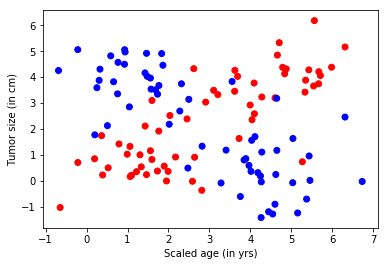

/Users/she/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1645: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Step: 0 Current loss: 0.35690498
Step: 1000 Current loss: 0.13881281
Step: 2000 Current loss: 0.118129954
Step: 3000 Current loss: 0.108342215
Step: 4000 Current loss: 0.10326246
Step: 5000 Current loss: 0.101049654
Step: 6000 Current loss: 0.10002745
Step: 7000 Current loss: 0.09966451
Step: 8000 Current loss: 0.09949161
Step: 9000 Current loss: 0.09939586
Step: 10000 Current loss: 0.099332035
Step: 11000 Current loss: 0.09928773
Step: 12000 Current loss: 0.09925545
Step: 13000 Current loss: 0.09923197
Step: 14000 Current loss: 0.09921556
Step: 15000 Current loss: 0.099204764
Step: 16000 Current loss: 0.09919777
Step: 17000 Current loss: 0.09919301
Step: 18000 Current loss: 0.09918946
Step: 19000 Current loss: 0.09918682


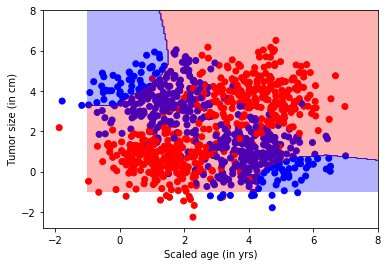

loss:
 0.09046697


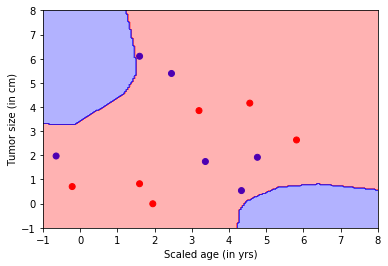

In [40]:
def onehot(y, start, end):
    ohe = OneHotEncoder()
    a = np.linspace(start, end-1, end-start)
    b = np.reshape(a, [-1, 1]).astype(np.int32)
    ohe.fit(b)
    c = ohe.transform(y).toarray()
    return c


def generate(sample_size, num_classes, diff, regression=False):
    np.random.seed(10)
    mean = np.random.randn(2)
    cov = np.eye(2)

    # len(diff)
    samples_per_class = int(sample_size/num_classes)

    X0 = np.random.multivariate_normal(mean, cov, samples_per_class)
    Y0 = np.zeros(samples_per_class)

    for ci, d in enumerate(diff):
        X1 = np.random.multivariate_normal(mean+d, cov, samples_per_class)
        Y1 = (ci+1)*np.ones(samples_per_class)

        X0 = np.concatenate((X0, X1))
        Y0 = np.concatenate((Y0, Y1))

    if regression == False:  # one-hot  0 into the vector "1 0
        Y0 = np.reshape(Y0, [-1, 1])
        # print(Y0.astype(np.int32))
        Y0 = onehot(Y0.astype(np.int32), 0, num_classes)
        # print(Y0)
    X, Y = shuffle(X0, Y0)
    #print(X, Y)
    return X, Y


# Ensure we always get the same amount of randomness
np.random.seed(10)

input_dim = 2
num_classes = 4
X, Y = generate(120, num_classes,  [[3.0, 0], [3.0, 3.0], [0, 3.0]], True)
Y = Y % 2
colors = ['r' if l == 0.0 else 'b' for l in Y[:]]
plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.xlabel("Scaled age (in yrs)")
plt.ylabel("Tumor size (in cm)")
plt.show()
Y = np.reshape(Y, [-1, 1])

learning_rate = 1e-4
n_input = 2
n_label = 1
n_hidden = 200


x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_label])

weights = {
    'h1': tf.Variable(tf.truncated_normal([n_input, n_hidden], stddev=0.1)),
    'h2': tf.Variable(tf.random_normal([n_hidden, n_label], stddev=0.1))
}
biases = {
    'h1': tf.Variable(tf.zeros([n_hidden])),
    'h2': tf.Variable(tf.zeros([n_label]))
}


layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['h1']), biases['h1']))

# Leaky relus
layer2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['h2'])
y_pred = tf.maximum(layer2, 0.01*layer2)

reg = 0.01
loss = tf.reduce_mean(
    (y_pred-y)**2)+tf.nn.l2_loss(weights['h1'])*reg+tf.nn.l2_loss(weights['h2'])*reg
train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss)

# 加载
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

for i in range(20000):

    X, Y = generate(1000, num_classes,  [[3.0, 0], [3.0, 3.0], [0, 3.0]], True)
    Y = Y % 2
    Y = np.reshape(Y, [-1, 1])

    _, loss_val = sess.run([train_step, loss], feed_dict={x: X, y: Y})

    if i % 1000 == 0:
        print("Step:", i, "Current loss:", loss_val)

colors = ['r' if l == 0.0 else 'b' for l in Y[:]]
plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.xlabel("Scaled age (in yrs)")
plt.ylabel("Tumor size (in cm)")


nb_of_xs = 200
xs1 = np.linspace(-1, 8, num=nb_of_xs)
xs2 = np.linspace(-1, 8, num=nb_of_xs)
xx, yy = np.meshgrid(xs1, xs2)  # create the grid
# Initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        #classification_plane[i,j] = nn_predict(xx[i,j], yy[i,j])
        classification_plane[i, j] = sess.run(
            y_pred, feed_dict={x: [[xx[i, j], yy[i, j]]]})
        classification_plane[i, j] = int(classification_plane[i, j])

# Create a color map to show the classification colors of each grid point
cmap = ListedColormap([
    colorConverter.to_rgba('r', alpha=0.30),
    colorConverter.to_rgba('b', alpha=0.30)])
# Plot the classification plane with decision boundary and input samples
plt.contourf(xx, yy, classification_plane, cmap=cmap)
plt.show()


xTrain, yTrain = generate(
    12, num_classes,  [[3.0, 0], [3.0, 3.0], [0, 3.0]], True)
yTrain = yTrain % 2
colors = ['r' if l == 0.0 else 'b' for l in yTrain[:]]
plt.scatter(xTrain[:, 0], xTrain[:, 1], c=colors)
plt.xlabel("Scaled age (in yrs)")
plt.ylabel("Tumor size (in cm)")
# plt.show()
yTrain = np.reshape(yTrain, [-1, 1])
print("loss:\n", sess.run(loss, feed_dict={x: xTrain, y: yTrain}))

nb_of_xs = 200
xs1 = np.linspace(-1, 8, num=nb_of_xs)
xs2 = np.linspace(-1, 8, num=nb_of_xs)
xx, yy = np.meshgrid(xs1, xs2)  # create the grid
# Initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        #classification_plane[i,j] = nn_predict(xx[i,j], yy[i,j])
        classification_plane[i, j] = sess.run(
            y_pred, feed_dict={x: [[xx[i, j], yy[i, j]]]})
        classification_plane[i, j] = int(classification_plane[i, j])

# Create a color map to show the classification colors of each grid point
cmap = ListedColormap([
    colorConverter.to_rgba('r', alpha=0.30),
    colorConverter.to_rgba('b', alpha=0.30)])
# Plot the classification plane with decision boundary and input samples
plt.contourf(xx, yy, classification_plane, cmap=cmap)
plt.show()